# Интернет-магазин «Стримчик», продажа видео-игр

## Оглавление:
[Краткое описание](#start) <br>
[Описание данных](#data)
1. [Открытие данных](#open)
2. [Подготовка данных](#preprocessing) <br>
    2.1 [Переименуем названия столбцов](#preprocessing-1) <br>
    2.2 [Преобразуем данные в нужные типы](#preprocessing-2) <br>
    2.3 [Обработка пропусков](#preprocessing-3) <br>
    2.4 [Посчитаем суммарные продажи во всех регионах](#preprocessing-4) <br>
3. [Исследовательский анализ данных](#issled) <br>
    3.1 [Солько игр выпускалось в разные годы](#issled-1) <br>
    3.2 [Продажи по платформам](#issled-2) <br>
    3.3 [Выделение данных за актуальный период](#issled-3) <br>
    3.4 [Платформы лидирующие по продажам, рост и падения продаж](#issled-4) <br>
    3.5 [Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам](#issled-5) <br>
    3.6 [Влияние отзывов игроков и критиков на продажи](#issled-6) <br>
    3.7 [Распределение игр по жанрам](#issled-7) <br>
4. [Портрет пользователя каждого региона](#portr) <br>
    4.1 [Североамериканский рынок](#portr-1) <br>
    4.2 [Европейский рынок](#portr-2) <br>
    4.3 [Рынок Японии](#portr-3) <br>
5. [Проверка гипотез](#hip) <br>
    5.1 [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#hip-1) <br>
    5.2 [Средние пользовательские рейтинги жанров Action и Sports разные](#hip-2) <br>

[Выводы по проекту](#vivod)

<a id='start'></a>
## Краткое описание

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). <br> Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. <br>
<br>
#### Наша цель:
>🚩 __Выявить определяющие успешность игры закономерности.__ _Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании._

#### Для этого будут решены следующие задачи:
>📍 Открыть и ознакомиться с данными<br>
📍 Сделать подгатовку данных<br>
📍 Провести исследовательский анализ данных<br>
📍 Составить портрет пользователя каждого региона<br>
📍 Проверить гипотезы<br>
📍 Подвести итоги и ответить на вопрос проекта

<a id="data"></a>
## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).Эта ассоциация определяет рейтинг компьютерных игр иприсваивает им подходящую возрастную категорию.

_Данные за 2016 год могут быть неполными._

In [1]:
#   импорт необходимых библиотек
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

<a id='open'></a>
# 1. Откроем файл с данными и изучим общую информацию

In [2]:
df_games = pd.read_csv('../datasets/games.csv')

In [3]:
display(df_games.sample(5))
df_games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5228,Ryu Ga Gotoku Kenzan!,PS3,2008.0,Adventure,0.00,0.0,0.36,0.0,NaN,NaN,NaN
7269,Yoshi Touch & Go (JP sales),DS,2005.0,Platform,0.00,0.0,0.22,0.0,NaN,NaN,NaN
12493,Attack on Titan (KOEI),PS3,2016.0,Action,0.00,0.0,0.06,0.0,NaN,NaN,NaN
13548,Shaun the Sheep,DS,2008.0,Adventure,0.04,0.0,0.00,0.0,58.0,tbd,E
12453,Daito Giken Koushiki Pachi-Slot Simulator: Oss...,PSP,2006.0,Misc,0.00,0.0,0.06,0.0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


📌 __Выводы после открытия файла__
> - Необходимо переименовать названия столбцов (привести их к нижнему регистру)
> - Необходимо преобразовать данные в нужные типы
> - Необходимо обработать пропуски и заполнить в случае необходимости


>**<span style="color:green">Здесь всё структурировано и по делу, класс. </span>**
>


<a id='preprocessing'></a>
# 2. Подготовка данных

📝 Приведем все данные df к нижнему регистру

In [4]:
def object_to_low(df):
    for name_col in list(df):
        if df[name_col].dtype == 'O':
            df[name_col] = df[name_col].str.lower()
    return df

df_games = object_to_low(df_games)

print("Дубликаты:",df_games.duplicated().sum())

Дубликаты: 0


<a id='preprocessing-1'></a>
## 2.1 Переименуем названия столбцов (приведем их к нижнему регистру)

In [5]:
df_games.columns = map(str.lower, df_games.columns)
df_games.info()
df_games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


✅ _Имена столбцов приведены к нижнему регистру_

<a id='preprocessing-2'></a>
## 2.2 Преобразуем данные в нужные типы

📋 <br>
`year_of_release` - преобразуем в `int64`, так как год не может иметь дробную часть <br>
`user_score` - преобразуем в `float64`, так как там числа с плавающей точкой <br>
`critic_score` - преобразуем в `int64`, так как там целочисленные значения

In [6]:
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')
#df_games['user_score'] = df_games['user_score'].astype('float64')
df_games['critic_score'] = df_games['critic_score'].astype('Int64')

❗ В столбце `user_score` обнаружены значения `tbd` (_англ._ to be determined, _рус._ подлежит уточнению). Можно предположить, что данные значение не были уточнены или не были заполнены после уточнения, так или иначе для нас это роли не играет, это пустые значения, заполним их соответствующим образом

In [7]:
df_games['user_score'] = df_games['user_score'].where(df_games['user_score']!='tbd', other=np.nan)
df_games['user_score'] = df_games['user_score'].astype('float64')

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


✅ Данные преобразованны в необходимый формат. В процессе преобразования в столбце `user_score` обнаружены значения `tbd`, были заменены на `NaN`

<a id='preprocessing-3'></a>
## 2.3 Обработка пропусков

In [8]:
print('Пустые значения в фрейме:')
print(df_games.isna().sum())
print("-----")

Пустые значения в фрейме:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64
-----


### Столбец `name`

In [9]:
df_games[df_games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


❗ 2 безымянные игры также имеют достаточно мало информации, удалим их из датафрэйма

In [10]:
df_games = df_games.dropna(subset=['name'])

✅ Стоки с пустыми значениями удалены. Возможные причины появления пропусков: эти данные не собирались или они утеряны и не восстановлены за ненадобностью, игры старые под платформу Sega Genesis

### Столбец `year_of_release`

In [11]:
df_games[df_games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,<NA>,sports,4.26,0.26,0.01,0.71,94,8.5,e
377,fifa soccer 2004,ps2,<NA>,sports,0.59,2.36,0.04,0.51,84,6.4,e
456,lego batman: the videogame,wii,<NA>,action,1.80,0.97,0.00,0.29,74,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,<NA>,fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,space invaders,2600,<NA>,shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,<NA>,sports,0.01,0.00,0.00,0.00,43,NaN,e10+
16405,freaky flyers,gc,<NA>,racing,0.01,0.00,0.00,0.00,69,6.5,t
16448,inversion,pc,<NA>,shooter,0.01,0.00,0.00,0.00,59,6.7,m
16458,hakuouki: shinsengumi kitan,ps3,<NA>,adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


❗ Год релиза не указан в достаточно малом количестве данных (~1,1%), так что можно их удалить без значительного ущерба данным.

In [12]:
df_games = df_games.dropna(subset=['year_of_release'])

### Столбцы `critic_score`, `user_score` и `rating`

In [13]:
print('Процент пропусков critic_score составляет: {:.2%}'.format(df_games['critic_score'].isna().sum() / len(df_games)))
print('Процент пропусков user_score составляет: {:.2%}'.format(df_games['user_score'].isna().sum() / len(df_games)))
print('Процент пропусков rating составляет: {:.2%}'.format(df_games['rating'].isna().sum() / len(df_games)))

Процент пропусков critic_score составляет: 51.45%
Процент пропусков user_score составляет: 54.62%
Процент пропусков rating составляет: 40.60%


❗ Столбцы `user_score` и `rating` будут использоваться в текущей работе, однако у нас нет каких-либо данных для заполнения, а процент пропусков достаточно велик (в среднем около 50%) => удалить без вредя для данных не получится. Таким образом, лучшим решением считаю оставить пропуски как есть.

<a id='preprocessing-4'></a>
## 2.4 Посчитаем суммарные продажи во всех регионах

📋 <br>
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`.

In [14]:
df_games['total_sales'] = (df_games['other_sales']
                          + df_games['na_sales']
                          + df_games['eu_sales']
                          + df_games['jp_sales'])

📌 __Выводы по подготовке данных__
> - Были отформатированны наименования стобцов
> - Типы данных приведены к правильным
> - Обработанны пропуски в данных
> - Посчитаны суммарные продажи во всех регионах

<a id='issled'></a>
# 3. Исследовательский анализ данных

Функции, написанные для анализа <br>
👉__[ПРОПУСТИТЬ](#issled-1)__👈

In [15]:
#   Функции
#   Автоматизация построения графиков для исследовательского анализа данных

def do_hist(df,
            my_column,
            lab='', 
            my_bins=30,              
            my_color='royalblue'):   
    print(sns.distplot(df[my_column], 
                       kde=False, 
                       bins=my_bins
                       )
         )
    plt.xlabel(lab)
    
    
def do_barplot(df, 
               my_column, 
               my_index, 
               func='sum', 
               size_x=10, 
               size_y=0):
    var_table = df.pivot_table(my_column, 
                               index=my_index, 
                               aggfunc=func)
    var_table = var_table.sort_values(by=my_column, 
                                      ascending=False)
    if size_y == 0:
        size_y = len(var_table) / 3
    print(plt.figure(figsize=(size_x, size_y)))
    print(sns.barplot(x=my_column, 
                      y=var_table.index, 
                      data=var_table))
    
    
def do_pie(df, 
           my_column, 
           my_index, 
           func='sum', 
           size_x=6, 
           size_y=6, 
           my_number=10):
    var_table = df.pivot_table(my_column, 
                               index=my_index, 
                               aggfunc=func)
    var_table = var_table.sort_values(by=my_column, 
                                      ascending=False)
    
    var_table = var_table.head(my_number)
    labels = var_table.index
    sizes = var_table[my_column]
    explode = []
    for i in range(len(var_table)):
        if i < 5:
            explode.append(0.07)
        else:
            explode.append(0)
    plt.figure(figsize=(size_x, size_y))
    plt.pie(sizes, 
            explode=explode, 
            labels=labels,
            autopct='%1.1f%%', 
            shadow=True, 
            startangle=140)

    plt.axis('equal')
    plt.show()
    

<a id='issled-1'></a>
## 3.1 Солько игр выпускалось в разные годы

📊 <br>
Построим гитограмму на основе игр по годам

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\p3ori\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Количество выпускаемых игр по годам')

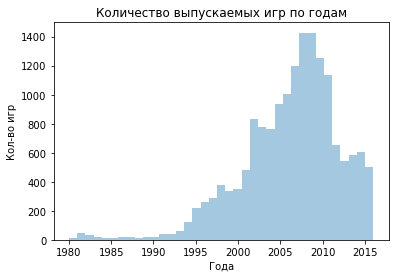

In [16]:
do_hist(df_games, 'year_of_release', 'Года' , 37)
plt.ylabel('Кол-во игр')
plt.title('Количество выпускаемых игр по годам')

✅ Как мы видим, пик по выпуску игр был примерно в 2007-2008 годах. <br>
Отвечая на вопрос нужены ли нам все года для анализа, можно ответить нет. Считаю, можно оставить игры, года выпуска которых совпадают с актуальными на 2016 год консолями (PS3, Xbox 360 и т.д.).

<a id='issled-2'></a>
## 3.2 Продажи по платформам

📊
Построим гитограмму продаж игр по платформам

Figure(720x744)
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Количество проданных игр по платформам')

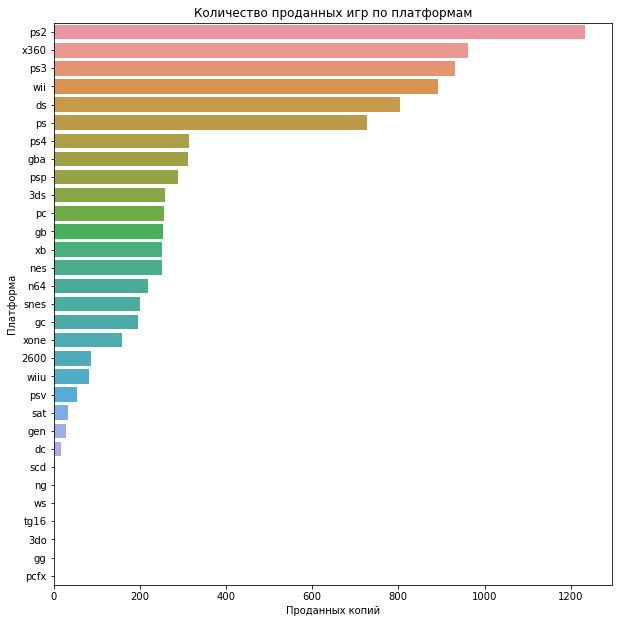

In [17]:
do_barplot(df_games, 'total_sales', 'platform')

plt.xlabel("Проданных копий")
plt.ylabel("Платформа")
plt.title('Количество проданных игр по платформам')

📝 Определим топ-5 наиболее популярных платформ и выведем графики по продажам игр на них по годам, это: <br>
1. ps2
2. x360
3. ps3
4. wii
5. ds

Text(0.5, 1.0, 'График продаж игр для 5 самых популярных платформ')

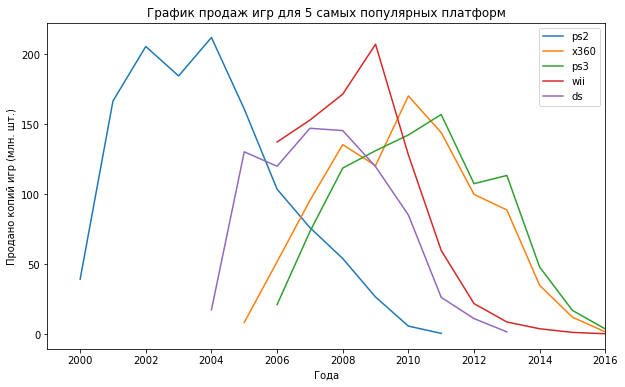

In [18]:
per = df_games.groupby(['year_of_release', 'platform'])['total_sales'].aggregate('sum').unstack()
game_platforms_sales = df_games.pivot_table('total_sales',
                                            index='platform',
                                            aggfunc='sum')
game_platforms_sales = game_platforms_sales.sort_values(by='total_sales', ascending=False)
top_5_platforms = game_platforms_sales.head(5)

plt.figure(figsize=(10, 6))
for platform in top_5_platforms.index:
    per[platform].plot()

plt.xlim(1999, 2016)
plt.legend()
plt.xlabel('Года')
plt.ylabel('Продано копий игр (млн. шт.)')
plt.title('График продаж игр для 5 самых популярных платформ')

✅ Исходя из выбранных конслоей можно выделить, что платформа "живет" ~ 10 лет

<a id='issled-3'></a>
## 3.3 Выделение данных за актуальный период

📝 Мы имеем 2 заключения: 
1. _за последние 10 лет (3.2)_ 
2. _с момента начала продаж актуальных на 2016г. консолей (3.1)_
Данные заключения друг другу не противоречат: в период 2007-2016 гг совсем недавно вышли Xbox360 и PS3 <br> 

✅ Таким образом за актуальные данные возьмем период 2007-2016 гг

In [19]:
df_games_actual = df_games[df_games['year_of_release'] > 2011]

<a id='issled-4'></a>
## 3.4 Платформы лидирующие по продажам, рост и падения продаж

📊 Построим гистограмму по прибыльности кансолей за весь актуальный период

Figure(720x264)
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'График проданных копий игр для платформ за актуальный период')

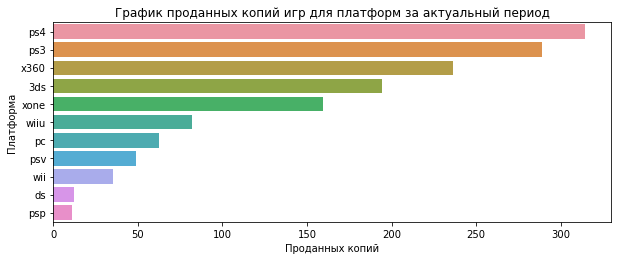

In [20]:
do_barplot(df_games_actual, 'total_sales', 'platform')

plt.xlabel("Проданных копий")
plt.ylabel("Платформа")
plt.title('График проданных копий игр для платформ за актуальный период')

📝 Как видно, наиболее прибыльные платформы за весь актуальный период это:
* Xbox360
* PS3
* Wii

📊 Построим теперь графики по продажам игр на данные платформы.

Text(0.5, 1.0, 'График продаж игр для платформ за актуальный период')

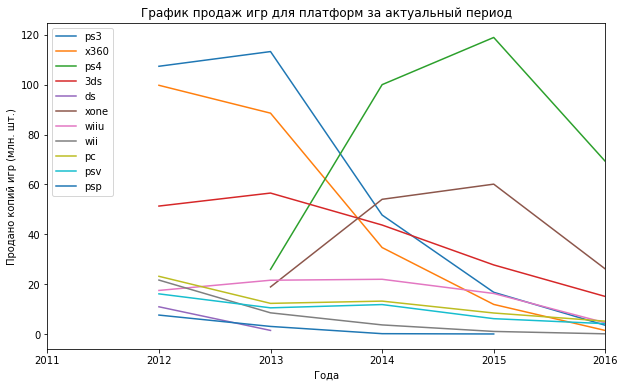

In [21]:
per = df_games_actual.groupby(['year_of_release', 'platform'])['total_sales'].aggregate('sum').unstack()

plt.figure(figsize=(10, 6))
for platform in df_games_actual['platform'].unique():
    per[platform].plot()

plt.xlim(2011, 2016)
plt.legend()
plt.xlabel('Года')
plt.ylabel('Продано копий игр (млн. шт.)')
plt.title('График продаж игр для платформ за актуальный период')

✅ Рост прибыли наблюдается только у платформа "нового поколения" 2016 года - __PS4__ и __Xbox One__. Данные платформы являются потенциально прибыльными, мы их рассматриваем далее. <br>
Время других платформ ушло.

<a id='issled-5'></a>
## 3.5 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Text(0.5, 1.0, 'Boxplot`ы всех платформ из актуального периода платформ')

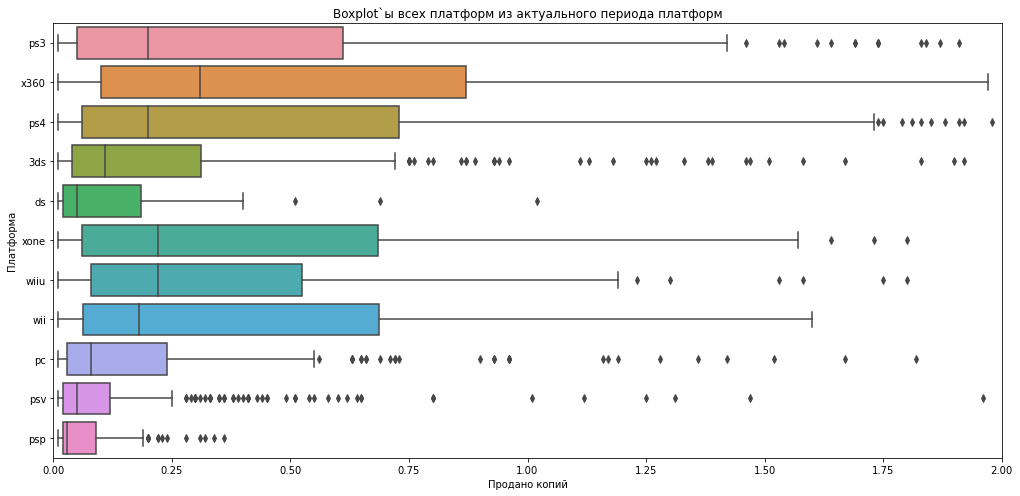

In [22]:
plt.figure(figsize=(17, 8))

sns.boxplot(data=df_games_actual,
            y='platform',
            x='total_sales',
            orient='h')
plt.xlabel("Продано копий")
plt.ylabel("Платформа")
plt.xlim(0, 2)
plt.title('Boxplot`ы всех платформ из актуального периода платформ')

✅ __Boxplot'ы были построены, можно сделать следующие выводы:__ <br>
- Графики ассиметричны со смещением влево, что говорит нам о том, что бóльшее кол-во игр проданны гораздо меньшим тиражом, чем бестселлеры, да и просто успешные игры.
- __Для перспективных платформ__ медианы и квартели PS4 и Xbox One примерно равны, однако "успешных" игр несколько больше на PS4
- Бестселлеров (выбросы) на PS4 больше, чем на Xbox One

<a id='issled-6'></a>
## 3.6 Влияние отзывов игроков и критиков на продажи

📝 Для анализа данного аспекта возьмем одну популярную платформу. Считаю, что стоит выбрать _платфлому PS3_, так как по ней было много продаж за весь период ее жизни, а также она хорошо вписывается в наши временные рамки.

Text(0.5, 1.0, 'Корреляция по Пирсону')

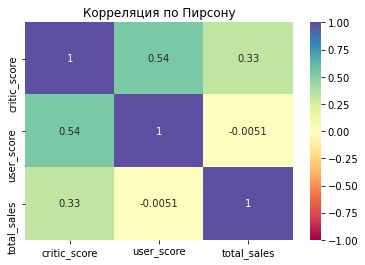

In [23]:
df_games_actual_ps3 = df_games_actual.query('platform == "ps3"')
sns.heatmap(df_games_actual_ps3[['critic_score', 'user_score', 'total_sales']].corr(), 
            annot = True,
            vmin=-1, 
            vmax=1, 
            center= 0,
            cmap='Spectral')
plt.title('Корреляция по Пирсону')

----------------------------------
Оценка критиков / итоговые продажи:


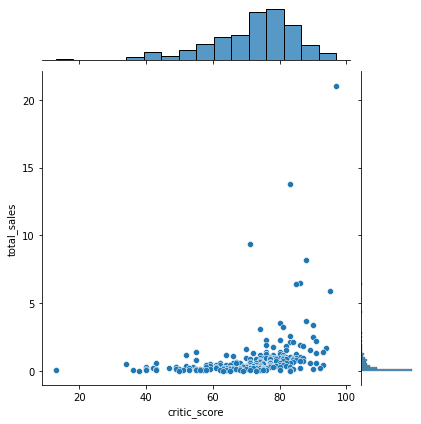

In [24]:
print(sns.jointplot(x='critic_score',
               y='total_sales',
               data=df_games_actual_ps3, 
               kind='scatter'))
print('----------------------------------')
print('Оценка критиков / итоговые продажи:')
# plt.title('Оценка критиков / итоговые продажи:')

----------------------------------
Оценка игроков / итоговые продажи:


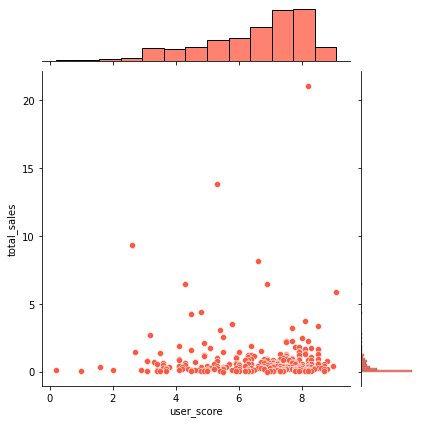

In [25]:
print(sns.jointplot(x='user_score',
                    y='total_sales',
                    data=df_games_actual_ps3, 
                    kind='scatter',
                    color="#ff5840"))
print('----------------------------------')
print('Оценка игроков / итоговые продажи:')

✅ __Выводы по зависимости продаж и оценок критиков и пользователей:__ <br>
Было рассмотренно влияние отзывов игроков и критиков на продажи на примере популярной платформы PS3, можно заключить, что:
- Зависимости между оценками критиков и итоговыми продажами прослеживается __умеренная__
- Зависимости между оценками пользователей и итоговыми продажами __крайне слабая__ <br>

Все это говорит нам о том, что игроки чаще доверяют оценкам критиков, нежели других игроков, однако, ни то ни другое не оказывает большое влияние на продажи. <br>

🔍 _Отметим, что оценки критиков и пользователей коррелируют друг с другом (~0.63 - "заметная корреляция")_

📝 Соотнесем выводы, сделанные по PS3 с другими консолями.

Text(0.5, 1.0, 'Корреляция по Пирсону')

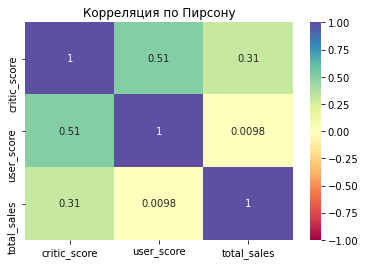

In [26]:
per = ['critic_score', 'user_score', 'total_sales']

sns.heatmap(df_games_actual.query('platform != "ps3"')[per].corr(), 
            annot = True,
            vmin=-1, 
            vmax=1, 
            center= 0,
            cmap='Spectral')
plt.title('Корреляция по Пирсону')

✅ _Как мы видим, результаты по всем платформам не отличаются, корреляция продаж от оценок, как критиков, так и пользователей одинаковы_

|                             |      PS3      | Другие платформы |
| --------------------------- | ------------- | ---------------- |
| Пользователи / продажи      | -0.0051        |   0.0098         |
|      Критики / продажи      | 0.33          |   0.31           |

<a id='issled-7'></a>
## 3.7 Распределение игр по жанрам

Figure(720x288)
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Количество игр в определенном жанре')

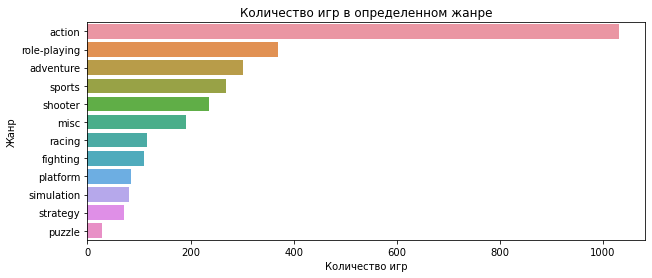

In [27]:
do_barplot(df_games_actual, 'total_sales', 'genre', 'count')

plt.xlabel('Количество игр')
plt.ylabel("Жанр")
plt.title('Количество игр в определенном жанре')

📝 Как мы видим, больше всего игр выпускаются в жанре _Action_ , меньше всего _Puzzle_. <br>
Посмотрим доходность жанров:

Figure(720x288)
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Проданные копии игр по жанрам')

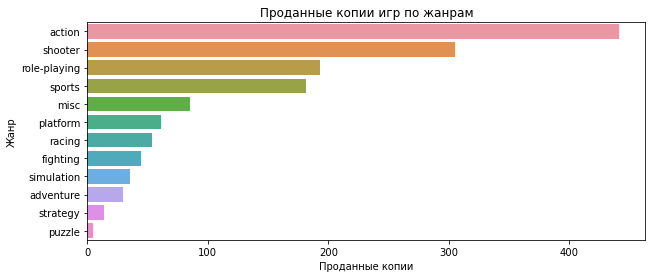

In [28]:
do_barplot(df_games_actual, 'total_sales', 'genre')

plt.xlabel("Проданные копии")
plt.ylabel("Жанр")
plt.title('Проданные копии игр по жанрам')

✅ __Выводы по распределению игр по жанрам__ <br>
- По масштабам разработки и прибыли первое место, со значительным отрывом от конкурентов, занимают игры в жанре _Action_.
- Второе место - Shooter, бронза - RPG.
- Наименее продаваемые игры - Puzzle и Strategy

---
📌 __Выводы по исследовательскому анализу данных__
>Исследование данных было проведено в полном объеме в соотстветствии с заданием проекта. По всем пунктам анализа сделан промежуточные выводы (✅).

<a id='portr'></a>
---
# 4. Портрет пользователя каждого региона

📝 Определим для пользователей каждого региона:
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

У нас есть 3 типа регионов:
- NA — Северная Америка
- EU — Европа
- JP — Япония

<a id='portr-1'></a>
## 4.1 Североамериканский рынок

📝 Построим круговые диаграммы по интересующим нас параметрам

Доля продаж игр по платформам (североамериканский рынок)


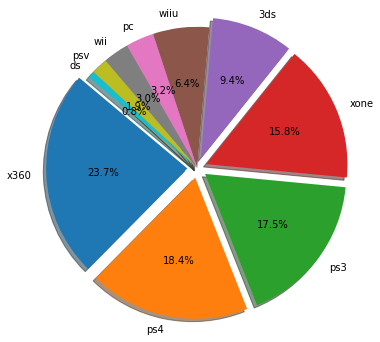

In [29]:
print('Доля продаж игр по платформам (североамериканский рынок)')
do_pie(df_games_actual, 'na_sales', 'platform')

✅ Как мы видим по круговой диаграмме, топ-5 популярных консолей в Северной Америке:
1. Xbox 360
2. Sony PS4
3. Sony PS3
4. Xbox One
5. Nintendo 3DS

Доля продаж игр по жанрам (североамериканский рынок)


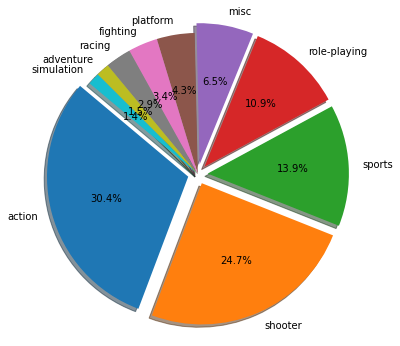

In [30]:
print('Доля продаж игр по жанрам (североамериканский рынок)')
do_pie(df_games_actual, 'na_sales', 'genre')

✅ Топ-5 популярных жанров в Северной Америке:
1. Action
2. Shooter
3. Sports
4. RPG
5. Misc (разное)

Доля продаж игр по возрастному рейтингу (североамериканский рынок)


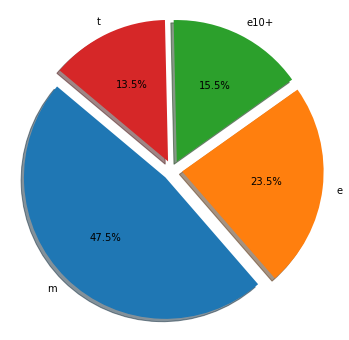

In [31]:
print('Доля продаж игр по возрастному рейтингу (североамериканский рынок)')
do_pie(df_games_actual, 'na_sales', 'rating', my_number=5)

✅ Топ-5 возрастных рейтингов с наибольшими продажами в Северной Америке:

1. «M» («Mature») — «Для взрослых»
2. «E» («Everyone») — «Для всех»
3. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
4. «T» («Teen») — «Подросткам»
5. -

<a id='portr-2'></a>
## 4.2 Европейский рынок

📝 Построим круговые диаграммы по интересующим нас параметрам

Доля продаж игр по платформам (европейский рынок)


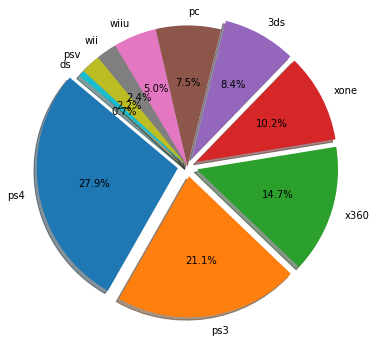

In [32]:
print('Доля продаж игр по платформам (европейский рынок)')
do_pie(df_games_actual, 'eu_sales', 'platform')

✅ Как мы видим по круговой диаграмме, топ-5 популярных консолей в Европе:
1. Sony PS4
2. Sony PS3
3. Xbox 360
4. Xbox One
5. Nintendo 3DS

Доля продаж игр по жанрам (европейский рынок)


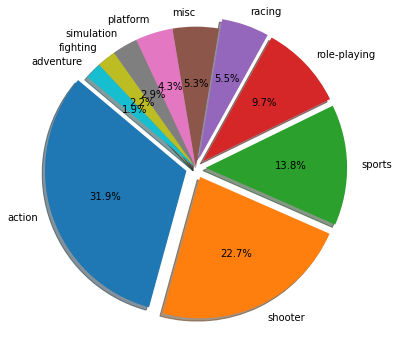

In [33]:
print('Доля продаж игр по жанрам (европейский рынок)')
do_pie(df_games_actual, 'eu_sales', 'genre')

✅ Топ-5 популярных жанров в Европе:
1. Action
2. Shooter
3. Sports
4. RPG
5. Racing

Доля продаж игр по возрастному рейтингу (европейский рынок)


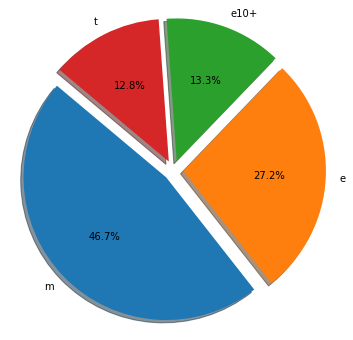

In [34]:
print('Доля продаж игр по возрастному рейтингу (европейский рынок)')
do_pie(df_games_actual, 'eu_sales', 'rating', my_number=5)

✅ Топ-5 возрастных рейтингов с наибольшими продажами в Европе:

1. «M» («Mature») — «Для взрослых»
2. «E» («Everyone») — «Для всех»
3. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
4. «T» («Teen») — «Подросткам»
5. -

<a id='portr-3'></a>
## 4.3 Рынок Японии

📝 Построим круговые диаграммы по интересующим нас параметрам

Доля продаж игр по платформам (Япония)


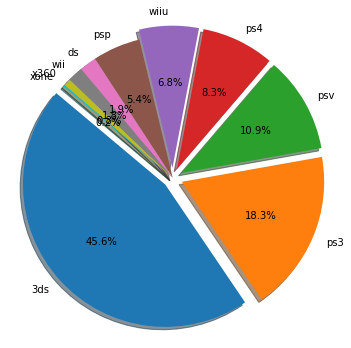

In [35]:
print('Доля продаж игр по платформам (Япония)')
do_pie(df_games_actual, 'jp_sales', 'platform')

✅ Как мы видим по круговой диаграмме, топ-5 популярных консолей в Японии:
1. Nintendo 3DS
2. Sony PS3
3. Sony PS Vita
4. Sony PPS4
5. Wii U

Доля продаж игр по жанрам (Япония)


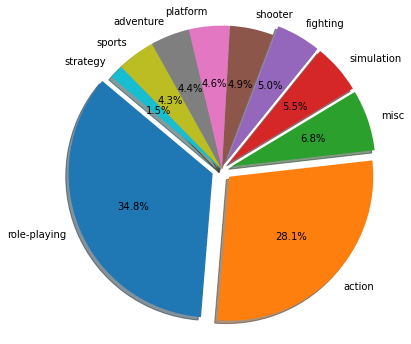

In [36]:
print('Доля продаж игр по жанрам (Япония)')
do_pie(df_games_actual, 'jp_sales', 'genre')

✅ Топ-5 популярных жанров в Японии:
1. RPG
2. Action
3. Misc (разное)
4. Simulation
5. Fighting

Доля продаж игр по возрастному рейтингу (Япония)


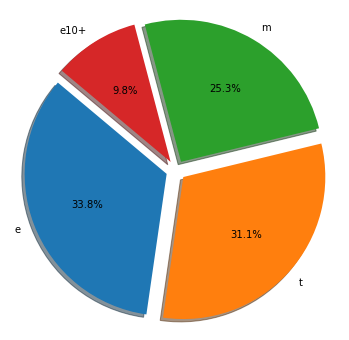

In [37]:
print('Доля продаж игр по возрастному рейтингу (Япония)')
do_pie(df_games_actual, 'jp_sales', 'rating', my_number=5)

✅ Топ-5 возрастных рейтингов с наибольшими продажами в Японии:

1. «E» («Everyone») — «Для всех»
2. «T» («Teen») — «Подросткам»
3. «M» («Mature») — «Для взрослых»
4. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
5. -

---
📌 __Выводы по портрету пользователя каждого региона__
> __Северная Америка__ :
>> По возрасту пользователь как правило уже взрослый (17+), обладающий стационарной платформой: Xbox или Sony PS. Предпочитает игры в жанрах: Action, Shooter и Sports.

> __Европа__ :
>> По возрасту пользователь как правило уже взрослый (17+), обладающий платформой: наиболее вероятно стационарной консолью Sony PS, чуть менее Xbox. Предпочитает игры в жанрах: Action, Shooter и Sports.

> __Япония__ :
>> По возрасту "средний" пользователь моложе, чем в Северной Америке или Европе. Обладает скорее всего портативной платформой: наиболее вероятно Nintendo 3DS, если стационарная то Sony PS. Предпочитает игры в жанрах: RPG, Action или Simulation.

> __Рейтинг ESRB влияет на продажи__. Пользователи "Западного" мира по большей части покупаю игры для взрослой аудитории (17+), далее по продажам идут «E» («Everyone») — «Для всех», «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». <br>
> В Японии больше всего продаются игры рейтингом «E» («Everyone») — «Для всех», далее по продажам идут «T» («Teen») — «Подросткам» и «M» («Mature») — «Для взрослых».
---

<a id='hip'></a>
---
# 5. Проверка гипотез

📝 Проверим 2 гипотизы: <br>
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<a id='hip-1'></a>
## 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

📝 Для проверки данной гепотизы начнём с формулировки нулевой гипотезы H₀ _"Средние пользовательские рейтинги платформы Xbox One __равны__ средним пользовательским рейтингам на PC"_ <br>
Исходя из H₀ сформулируем гипотезу H₁. Для этой H₀ она звучит как _"Средние пользовательские рейтинги платформы Xbox One __не равны__ средним пользовательским рейтингам на PC"_<br>
Уровень статистической значимости (пороговое значение alpha) зададим равным 1%.

Посчитаем дисперсии обеих выборок:

In [38]:
print("Дисперсия пользовательского рейтинга на Xbox One:", 
      np.var(df_games_actual.query('platform == "xone"')['user_score'], 
             ddof=1))
print("Дисперсия пользовательского рейтинга на PC:", 
      np.var(df_games_actual.query('platform == "pc"')['user_score'], 
             ddof=1))

Дисперсия пользовательского рейтинга на Xbox One: 1.9069968429360702
Дисперсия пользовательского рейтинга на PC: 2.7704439971584156


❗ Так как дисперсии неравны для проверки гипотизы используем t-критерий Уэлча (equal_var=False)

In [39]:
print('Средний пользовательский рейтинг на Xbox One =', 
      df_games_actual.query('platform == "xone"')['user_score'].mean())
print('Средний пользовательский рейтинг на PC =', 
      df_games_actual.query('platform == "pc"')['user_score'].mean())
print()
alpha = .01 # критический уровень статистической значимости

results = st.ttest_ind(
    df_games_actual.query('platform == "xone"')['user_score'], 
    df_games_actual.query('platform == "pc"')['user_score'],
    equal_var=False,
    nan_policy='omit')

print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг на Xbox One = 6.52142857142857
Средний пользовательский рейтинг на PC = 6.428640776699027

p-значение: 0.5489537965134426
Не получилось отвергнуть нулевую гипотезу


💡  __Выводы по гипотизе__ <br>
> Средний пользовательский рейтинг и p-значение (55%) не дает нам основание отвергнуть H₀ гепотизу. <br> 
<br>
Таким образом, мы __принимаем гипотизу__ _"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"_

<a id='hip-2'></a>
## 5.2 Средние пользовательские рейтинги жанров Action и Sports разные

📝 Для проверки данной гепотизы начнём с формулировки нулевой гипотезы H₀ _"Средние пользовательские рейтинги жанра Action __равны__ средним пользовательским рейтингам жанра Sports"_ <br>
Исходя из H₀ сформулируем гипотезу H₁. Для этой H₀ она звучит как _"Средние пользовательские рейтинги жанра Action __не равны__ средним пользовательским рейтингам жанра Sports"_ <br>
Уровень статистической значимости (пороговое значение alpha) зададим равным 1%.

In [40]:
print("Дисперсия пользовательского рейтинга Action:", 
      np.var(df_games_actual.query('genre == "action"')['user_score'], 
             ddof=1))
print("Дисперсия пользовательского рейтинга Sports:", 
      np.var(df_games_actual.query('genre == "sports"')['user_score'], 
             ddof=1))

Дисперсия пользовательского рейтинга Action: 1.8890840494348116
Дисперсия пользовательского рейтинга Sports: 3.022890298704733


❗ Так как дисперсии неравны для проверки гипотизы используем t-критерий Уэлча (equal_var=False)

In [41]:
print('Средний пользовательский рейтинг на Xbox One =', 
      df_games_actual.query('genre == "action"')['user_score'].mean())
print('Средний пользовательский рейтинг на PC =', 
      df_games_actual.query('genre == "sports"')['user_score'].mean())
print()
alpha = .01 # критический уровень статистической значимости

results = st.ttest_ind(
    df_games_actual.query('genre == "action"')['user_score'], 
    df_games_actual.query('genre == "sports"')['user_score'],
    equal_var=False,
    nan_policy='omit')

print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг на Xbox One = 6.825047801147237
Средний пользовательский рейтинг на PC = 5.455897435897437

p-значение: 4.2430777657264175e-20
Отвергаем нулевую гипотезу


💡  __Выводы по гипотизе__ <br>
> p-значение (4.5406655100578186e-11) дает нам основание отвергнуть H₀ гепотизу. <br> 
<br>
Таким образом, мы __отвергаем гипотизу H₀__ => __принимаем гипотизу__ _"Средние пользовательские рейтинги жанров Action и Sports разные"_ .

---
<a id='vivod'></a>
# Выводы по проекту

🚩 Нашей целью было __выявить определяющие успешность игры закономерности__. Что нам удалось получить:
1. Так как мы прогнозируем на 2017г. (а сейчас 2016 г.), то для успешных продаж игры стоит их выпускать на платформах нового поколения (Sony PS4 или/и Xbox One), так как спрос на игры на этих консолях, по нашим данным, растет (п. 3.4)
2. При выборе жанра игры стоит ориентироваться на регион:
> - Северная Америка и Европа - наиболее популярные жанры: Action, Shooter и Sports
> - Япония - наиболее популярные жанры: RPG, Action и Simulation.
3. При выборе возрастного рейтинга, стоит учитывать, что: 
> - Северная Америка и Европа - большие продажи у рейтинга «M» («Mature») — «Для взрослых», затем «E» («Everyone») — «Для всех» и «T» («Teen») — «Подросткам»
> - Япония - тут, видимо, аудитория чуть младше - большие продажи у рейтинга «E» («Everyone») — «Для всех», а за ним «T» («Teen») — «Подросткам» и «M» («Mature») — «Для взрослых».
4. Не стоит сильно надеятся на отзывы от критиков или пользователей, на продажи это влияет несильно.
---
__💡 Проверка гипотез:__ <br>
>_Средние пользовательские рейтинги платформ Xbox One и PC одинаковые_ <br>
✅ Принимаем гипотизу  <br>
 <br>
_Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные._ <br>
✅ Принимаем гипотизу <br>
